<h1><center>Laboratorio 4: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Nicolás Acevedo
- Nombre de alumno 2: Fabiola Pizarro


### **Link de repositorio de GitHub:** https://github.com/nicoacevedor/MDS7202

### Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **Ausentes tienen nota máxima 6.0**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1]:
# Se instalan las librerías que no están instaladas

try:
    # Libreria Core del lab.
    import numpy as np
    import pandas as pd
    from IPython.display import display

    #Libreria para plotear
    import plotly.express as px

    # Librerias utiles
    from sklearn.preprocessing import StandardScaler

except:
    print("Instalando librerías faltantes...")
    !pip install --upgrade numpy pandas IPython plotly scikit-learn

    import numpy as np
    import pandas as pd
    from IPython.display import display
    import plotly.express as px
    from sklearn.preprocessing import StandardScaler

# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos. 
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados. 




In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset. 


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [3]:
# Especificar el tipo de datos por columna
dtypes = {
    'names': str,
    'gender': str,
    'race/ethnicity': str,
    'parental level of education': str,
    'lunch': str,
    'test preparation course': str,
    'math score': float,
    'reading score': float,
    'writing score': float
}
df_grades = pd.read_json("students_grades.json", dtype=dtypes)

In [4]:
df_grades[df_grades['names'] == 'Paul Hyder']

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
18,Paul Hyder,male,group D,master's degree,standard,none,95,142,147
853,Paul Hyder,male,group D,master's degree,standard,none,95,81,84



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas. 

**To-Do**
1. [ ] Imprimir un mensaje con las dimensiones del Dataframe.
2. [ ] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [ ] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [ ] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [ ] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [ ] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [ ] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [ ] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [ ] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [ ] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c) 

**Respuesta:**

In [5]:
def exploratory_data_analysis(dataframe):
    # librería usada en la parte 9
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install --upgrade matplotlib
        import matplotlib.pyplot as plt
    # 1
    print(f"1.- El DataFrame tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")

    # 2
    print(f"\n2.- El DataFrame está compuesto por las siguientes columnas: {dataframe.columns.tolist()}")

    # 3
    print("\n3.- Ejemplos de filas del DataFrame:")

    # Primeras 5 filas
    print("\nPrimeras 5 filas:")
    display(dataframe.head())

    # Últimas 5 filas
    print("\nÚltimas 5 filas:")
    display(dataframe.tail())

    # Muestreo aleatorio de 5 filas
    print("\nMuestreo aleatorio de 5 filas:")
    display(dataframe.sample(5))

    # 4
    dataframe["math score"] = pd.to_numeric(dataframe["math score"], errors='coerce')
    dataframe["reading score"] = pd.to_numeric(dataframe["reading score"], errors='coerce')
    dataframe["writing score"] = pd.to_numeric(dataframe["writing score"], errors='coerce')
    print("\n4.- Descripción numérica del Dataframe:")
    display(dataframe.describe(include=[np.number]))

    # 5
    print("\n5.- Cantidad de valores nulos por columna:")
    display(dataframe.isna().sum())

    # 6
    print("\n6.- Cantidad de valores únicos por columna:")
    display(dataframe.nunique())

    # 7
    duplicados = dataframe.duplicated(subset='names')
    print(f"\n7.- Presenta un total de {duplicados.sum()} filas con nombres duplicados.")

    # 8
    if duplicados.sum() > 0: #si es que hay duplicados
        print("\n8.- Las filas con nombres duplicados son:")
        display(dataframe[duplicados])
    else: 
        print("\n8.- No hay filas con nombres duplicados.")

    # 9
    print("\nBoxplot de notas:")
    # Se crea un dataframe que posee solo las variables numéricas
    df_notas = dataframe[['math score', 'reading score', 'writing score']]
    ax = df_notas.plot.box()
    plt.title("Boxplot de notas")
    plt.ylabel("Notas")
    plt.show()

1.- El DataFrame tiene 1400 filas y 9 columnas

2.- El DataFrame está compuesto por las siguientes columnas: ['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37,46,46
1,Madeline Fuller,female,group C,some high school,standard,none,124,142,142
2,Daniel Rester,male,group E,associate's degree,standard,none,156,196,193
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
4,Geraldine Hale,female,group A,associate's degree,standard,none,131,166,166



Últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193,142,193
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66,74,81
1397,Laurie Carter,female,group B,some high school,standard,completed,54,61,62
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193,196,193
1399,Amanda Perez,female,group A,high school,standard,completed,68,80,76



Muestreo aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
233,Thomas Simmons,male,group C,bachelor's degree,standard,completed,131,171,196
400,Stanley Mcgahan,male,group C,associate's degree,standard,none,193,,142
101,Cathy Kuhl,female,group E,high school,free/reduced,completed,57,75,73
1322,Cleo Jefferson,female,group D,master's degree,standard,none,87,100,100
287,Ana Rodriguez,female,group C,high school,standard,none,193,,



4.- Descripción numérica del Dataframe:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000



5.- Cantidad de valores nulos por columna:


names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64


6.- Cantidad de valores únicos por columna:


names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64


7.- Presenta un total de 247 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0



Boxplot de notas:


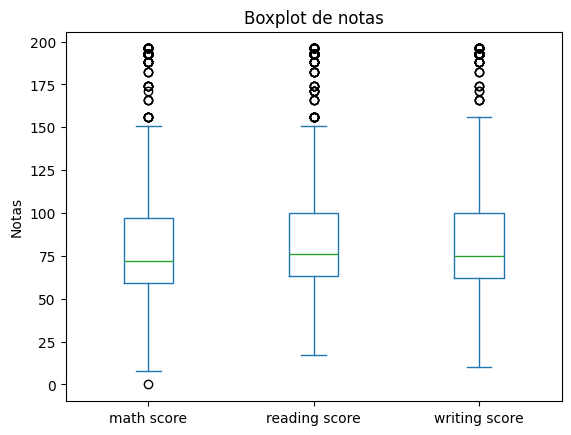

In [6]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
Se observan distintas anomalías en el dataset. En efecto, como se menciona previamente, el dataset tiene 1400 filas, lo que supera las 875 filas esperadas de las matrículas que se tienen. Respecto a los valores nulos, son 3 las columnas que sí poseen valores nulos, las que corresponden a las columnas numéricas con las notas de los alumnos. Específicamente se tienen 40 nulos en la columna de "math score", 40 nulos en "reading score" y 47 nulos en "writing score". Por otro lado, se tienen 247 filas con nombres duplicados en el dataset. 

Del boxplot se observan distintos puntos importantes en los datos. Se ve que la mediana de cada uno de ellos está cerca del 75, lo cual a pesar de que es un valor "alto" (considerando que las notas van de 0 a 100) no es un valor que indique una anomalía de por sí. Lo extraño se puede ver de mejor manera en que el tercer cuartil de cada uno de los boxplots está alrededor del número 100, lo que da a entender que existe un 25% de los datos que, aproximadamente, tiene notas superiores a 100, lo cual no tiene sentido porque 100 es la calificación más alta. De hecho, se ve que el "maximum" de los boxplots está alrededor del valor 150. Incluso, se logran visualizar bastantes outliers, que son los puntos negros sobre los boxplots, que indican que hay valores que están muy cercanos al 200. Todo esto marca que existe una clara anomalía respecto a las notas, ya que estas deberían estar entre el 0 y el 100, ya que corresponden a porcentajes de logro, pero existen mucho valores que no cumplen con esto.
```

**Respuesta Esperada:**

1.- El DataFrame tiene 1400 filas y 9 columnas

2.- El DataFrame está compuesto por las siguientes columnas: ['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Madeline Fuller,female,group C,some high school,standard,none,124.0,142.0,142.0
2,Daniel Rester,male,group E,associate's degree,standard,none,156.0,196.0,193.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
4,Geraldine Hale,female,group A,associate's degree,standard,none,131.0,166.0,166.0



Últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193.0,196.0,193.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



Muestreo aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
11,Frankie Malan,male,group D,associate's degree,free/reduced,completed,188.0,131.0,193.0
440,Kenneth Pyles,male,group C,associate's degree,free/reduced,none,124.0,NaN,156.0
951,Geraldine Gamboa,female,group C,some college,free/reduced,none,59.0,62.0,64.0
79,Joe Burks,male,group E,high school,standard,none,80.0,76.0,65.0
754,Robert Sturgeon,male,group E,some college,standard,none,83.0,80.0,73.0



4.- Descripción numérica del Dataframe:


,math score,reading score,writing score
count,1360.000000,1360.000000,1353.000000
mean,89.538971,93.086029,91.852919
std,47.152422,46.385775,47.043570
min,0.000000,17.000000,10.000000
25%,59.000000,63.000000,62.000000
50%,72.000000,76.000000,75.000000
75%,97.250000,100.000000,100.000000
max,196.000000,196.000000,196.000000



5.- Cantidad de valores nulos por columna:


names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64


6.- Cantidad de valores únicos por columna:


names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64


7.- Presenta un total de 247 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0



Boxplot de notas:


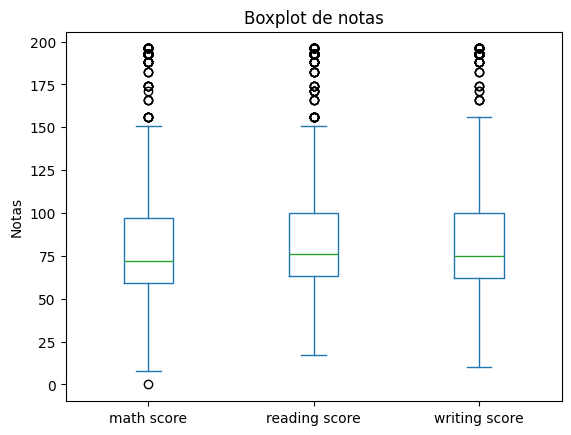

In [7]:
exploratory_data_analysis(df_grades)

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Habiendo limpiado el `DataFrame`, compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [ ] Crear función que permita limpiar el dataset.
- [ ] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta:**

In [8]:
def clean_data(dataframe):
    """Realiza una limpieza del dataset entregado

    Parameters
    ----------
    dataframe : pd.DataFrame
        Dataframe que posee la información de los alumnos y sus respectivas notas.

    Returns
    -------
    dataframe : pd.Dataframe
        Dataframe de entrada pero que fue limpiado, lo que implica que no posee valores duplicados de acuerdo a su nombre, no posee NaN
        y las notas se encuentran dentro del margen indicado (entre 0 y 100).            
    """
    # Se crean las condiciones de la notas que deben tener los alumnos (queries con máscaras booleandas)
    mascara = ((dataframe['math score'] >= 0) & (dataframe['math score'] <= 100) &
        (dataframe['reading score'] >= 0) & (dataframe['reading score'] <= 100) &
        (dataframe['writing score'] >= 0) & (dataframe['writing score'] <= 100))
    # Solo se mantienen las notas que estén entre 0 y 100
    dataframe = dataframe.loc[mascara]
    # Se eliminan los duplicados de acuerdo a los nombres
    dataframe = dataframe.drop_duplicates(subset='names')
    # Se eliminan los NaN
    dataframe = dataframe.dropna()
    # Se resetean los indices
    dataframe = dataframe.reset_index(drop = True)
    return dataframe

df_grades = clean_data(df_grades)
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
2,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
3,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
4,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
996,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
998,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


> Utilice la función creada en el punto 1.1 para verificar sus resultados.

1.- El DataFrame tiene 1000 filas y 9 columnas

2.- El DataFrame está compuesto por las siguientes columnas: ['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
2,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
3,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
4,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0



Últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
996,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
998,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
999,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



Muestreo aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
817,Kimberly Routzahn,female,group C,master's degree,free/reduced,none,52.0,65.0,61.0
894,Bobby Lloyd,male,group C,some college,standard,none,58.0,49.0,42.0
962,Stanley Chappell,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
904,Donna Duarte,female,group C,high school,standard,none,65.0,69.0,67.0
399,Stanley Denny,male,group C,master's degree,free/reduced,none,54.0,59.0,50.0



4.- Descripción numérica del Dataframe:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



5.- Cantidad de valores nulos por columna:


names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


6.- Cantidad de valores únicos por columna:


names                          1000
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
dtype: int64


7.- Presenta un total de 0 filas con nombres duplicados.

8.- No hay filas con nombres duplicados.

Boxplot de notas:


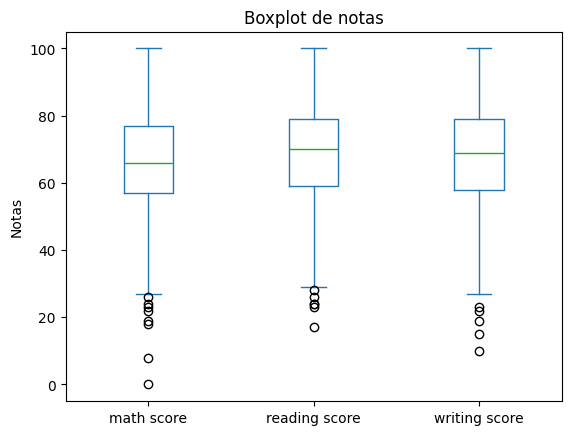

In [9]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
Se observa que ya no existen anomalías, puesto que ahora el dataset posee 875 filas que corresponde al número exacto de matrículas. Además, ya no existen valores nulos y tampoco filas con nombres duplicados. Cada una de las filas corresponde a un alumno distinto. Además, del boxplot se ve que todas las notas ya están dentro de lo esperado, ya que os valores máximos corresponden a 100 y los mínimos a 0. En consecuencia, se puede afirmar que se logró limpiar correctamente los datos.
```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas del dataframe y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [ ] Tranforme los valores a la escala chilena.

**Respuesta:**

In [10]:
def nota_chilena(dataframe_in, columna):
    """Convierte las notas desde la escala porcentual a la escala chilena para una columna en particular.

    Parameters
    ----------
    dataframe_in : pd.DataFrame
        Dataframe que posee la información de los alumnos y sus respectivas notas.
    columna : String
        Nombre de la columna a la cual se desea hacer la conversión de escala.

    Returns
    -------
    dataframe_in : pd.Dataframe
        Dataframe con la respectiva columna de notas convertida a escala chilena, redondeado al segundo decimal.            
    """
    dataframe_in[columna] = dataframe_in[columna].apply(lambda x: round(x*0.06 + 1, 2))
    return dataframe_in

In [11]:
nota_chilena(df_grades,"math score")
nota_chilena(df_grades,"reading score")
nota_chilena(df_grades,"writing score")
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del `DataFrame` original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [ ] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el `DataFrame` original.


**Respuesta:**

In [12]:
def alumnos_promedio(dataframe_in):
  dataframe_in["GPA"] = dataframe_in[["math score", "reading score", "writing score"]].mean(axis=1).apply(lambda x: round(x, 2))
  return dataframe_in

**Respuesta Esperada:**

In [13]:
df_grades = alumnos_promedio(df_grades)
df_grades.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes: 
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [ ] Obtener DataFrame con los alumnos que reprobaron el año.
- [ ] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [ ] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [14]:
def reprobados_destacados(dataframe_in):
    """Filtra los alumnos por reprobados o destacados

    Parameters
    ----------
    dataframe_in : pd.DataFrame
        Dataframe que posee la información de los alumnos y sus respectivas notas.

    Returns
    -------
    reprobados : pd.Dataframe
        Dataframe con los alumnos reprobados, es decir, GPA menor a 4.0.
    df_R : pd.Dataframe
        Dataframe original con los alumnos reprobados marcados con GPA 'R'.
    destacados : pd.Dataframe
        Dataframe con los alumnos destacados, es decir, cada asignatura mayor a 5.8.
    """

    reprobados = dataframe_in.loc[dataframe_in['GPA'] < 4.0]
    destacados = dataframe_in.loc[(dataframe_in['math score'] > 5.8) &
                                  (dataframe_in['reading score'] > 5.8) &
                                  (dataframe_in['writing score'] > 5.8)]
    df_R = dataframe_in.copy()
    df_R.loc[df_R['GPA'] < 4.0, 'GPA'] = 'R'
    return reprobados, df_R, destacados


In [15]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(df_grades)
dataframe1

C:\Users\Nico\AppData\Local\Temp\ipykernel_17160\1136232160.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'R' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_R.loc[df_R['GPA'] < 4.0, 'GPA'] = 'R'


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
7,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
16,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
39,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
43,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
977,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
979,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
993,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
994,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [16]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
995,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
996,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
997,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
998,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [17]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
21,Shanna Braswell,female,group D,bachelor's degree,free/reduced,completed,6.58,7.00,7.00,6.86
29,Thelma Yeates,female,group E,associate's degree,free/reduced,completed,5.98,6.16,6.28,6.14
54,Natalie Turney,female,group E,associate's degree,standard,none,6.10,6.52,6.10,6.24
56,Elizabeth Quintero,female,group B,some college,standard,none,5.92,6.10,6.22,6.08
...,...,...,...,...,...,...,...,...,...,...
966,Earnest Cole,male,group D,some college,standard,completed,5.92,5.92,6.28,6.04
967,Frank Shaffer,male,group A,bachelor's degree,standard,none,6.46,6.76,6.52,6.58
971,Tammi Aline,female,group E,associate's degree,standard,completed,6.70,6.34,6.52,6.52
975,Charles Herandez,male,group D,master's degree,free/reduced,completed,6.04,6.34,6.40,6.26


**Respuesta:**

```
Escriba aqui su respuesta
```

### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno. 

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [18]:
def consulta_gpa(dataframe_in, lista_alumnos):
    """Filtra los alumnos por los nombres en la lista

    Parameters
    ----------
    dataframe_in : pd.DataFrame
        Dataframe que posee la información de los alumnos y sus respectivas notas.
    lista_alumnos : list[str]
        Lista con los nombres de los alumnos a consultar

    Returns
    -------
    new_df : pd.Dataframe
        Dataframe con los alumnos solicitados
    """
    
    new_df = dataframe_in[dataframe_in['names'].isin(lista_alumnos)]
    return new_df


lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
203,Lucille Stanphill,female,group C,high school,standard,none,5.86,6.04,5.92,5.94
396,Marcus Mcfarland,male,group C,bachelor's degree,standard,completed,4.78,4.84,4.96,4.86
446,Matthew Freeman,male,group B,high school,standard,completed,4.12,3.94,3.76,R
449,Dana Mojica,female,group D,high school,free/reduced,none,3.34,4.12,3.76,R
604,Paul Hyder,male,group D,master's degree,standard,none,6.70,5.86,6.04,6.2
647,Jeffrey Korn,male,group C,high school,standard,none,5.20,4.36,4.06,4.54
748,Robert Strain,male,group C,associate's degree,free/reduced,none,4.30,4.66,4.24,4.4
752,Ronald Jett,male,group D,high school,free/reduced,none,3.52,3.34,3.04,R
754,Hazel Posey,female,group B,some high school,free/reduced,none,2.44,3.28,2.62,R
849,Lorena Reed,female,group C,high school,free/reduced,none,3.16,4.18,3.58,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

In [19]:
# Código para quintiles 
# La variable que contenga los quintiles debe llamarse GPA cuantiles para que el gráfico funcione.
df_grades["GPA cuantiles"] = pd.qcut(df_grades["GPA"], 5, labels=['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])

# Código de gráfico 
fig = px.scatter(
    df_grades.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig


c:\Users\Nico\Desktop\uchile\MDS7202 - Laboratorio de Programación Científica para Ciencia de Datos\lab4\lib\site-packages\plotly\express\_core.py:2044: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


```
Escriba aqui su respuesta
```

Efectivamente, en el gráfico se puede visualizar que mientras menos estudios tengan los padres, más bajo es el rendimiento de los alumnos. Si bien no es un condicionante, lo cual se refleja en que existen alumnos con rendimiento muy alto sin importar el nivel de estudios de los padres, sí se puede notar que mientras más estudios tengan, los resultados de los alumnos son menos malos, pudiendo verse en que las notas más bajas de cada estrato van aumentando según el nivel de estudios alcanzado por los padres.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://gifdb.com/images/high/orange-cat-cat-walking-with-two-legs-xlgf7qx4i24da74f.gif" width="400">
</p>


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>